# Question 1 [15 pts]: Fit a logistic regression model using all variable

A logistic regression model was used to predict whether a song would reach the Top 10 on the Billboard Hot 100 Chart, utilizing all available musical features in the dataset. This model achieved an accuracy of 73.74% and an AUC of 0.82, indicating that it successfully predicts the ranking of songs approximately three-quarters of the time.

Steps Taken for the Analysis:

1.	Importing the Music Dataset: The dataset consists of 7,573 records and 39 fields, encompassing a wide range of musical features.
2.	Checking for Missing Values: A thorough examination revealed no missing values, ensuring that data completeness would not bias the model’s outcomes.
3.	Outlier Detection Using the IQR Method: While outliers can skew model performance by influencing error minimization, these outliers were not removed because they are inherent characteristics of the songs.
4.	Handling Outliers: Outliers were retained, as they represent authentic variations in the musical properties being analyzed.
5.	Handling Skewed Data: Several numerical features (timbre_0_min, timbre_1_max, timbre_10_max) exhibited skewness. A log transformation was applied to these features, which reduces skewness by compressing large values and spreading out smaller values, thereby creating a more balanced distribution.
6.	Data Splitting: The dataset was divided into training data (songs released before 2009) and testing data (songs released in 2010). This approach allows the model to be validated on unseen data, simulating real-world prediction scenarios.
7.	Performing Logistic Regression on Training Data: Analysis of p-values indicated that features such as time signature, tempo, and key had p-values greater than 0.05, suggesting they might not significantly contribute to the model’s predictive power. These features were considered for removal in subsequent steps to optimize model performance.
8.	Examining Coefficients: Key features influencing the model’s predictions were identified:
<br/>	•	Loudness (0.3015): Songs with higher loudness levels are more likely to reach the Top 10, suggesting a trend favoring louder music.
<br/>	•	Pitch (-44.6714): Higher pitch levels significantly decrease the likelihood of a song being in the Top 10, indicating a preference for lower-pitched songs.
9.	Confusion Matrix Analysis on Test Data:
<br/>	•	True Negatives: 4,524 instances correctly identified as not making the Top 10.
<br/>	•	False Positives: 1,617 instances incorrectly predicted as making the Top 10 (Type I Error).
<br/>	•	False Negatives: 274 instances incorrectly predicted as not making the Top 10 (Type II Error).
<br/>	•	True Positives: 786 instances correctly identified as making the Top 10.
<br/>The model tends to over-predict success (Top 10), which could lead to a misallocation of marketing resources towards songs unlikely to become hits. On the other hand, missing potential hits (Type II Error) could result in missed revenue opportunities.
10.	ROC Curve Analysis on Training Data:
<br/>	•	AUC = 0.5: Indicates no discriminative power, similar to random guessing.
<br/>	•	AUC < 0.5: Indicates worse performance than random guessing, which is rare.
<br/>	•	AUC > 0.5: Implies the model has discriminatory power, with higher values indicating better performance.
<br/>The AUC of 0.82 signifies that there is an 82% probability that the model will correctly rank a randomly chosen Top 10 song higher than a non-Top 10 song. This high AUC value suggests that the model effectively distinguishes between hits and non-hits.

These findings offer valuable insights for music producers and marketers, helping them refine strategies to promote songs with higher hit potential.

Code below for Q1:


Columns with more than 0 null values:
Series([], dtype: int64)

Number of rows before outlier removal: 7574


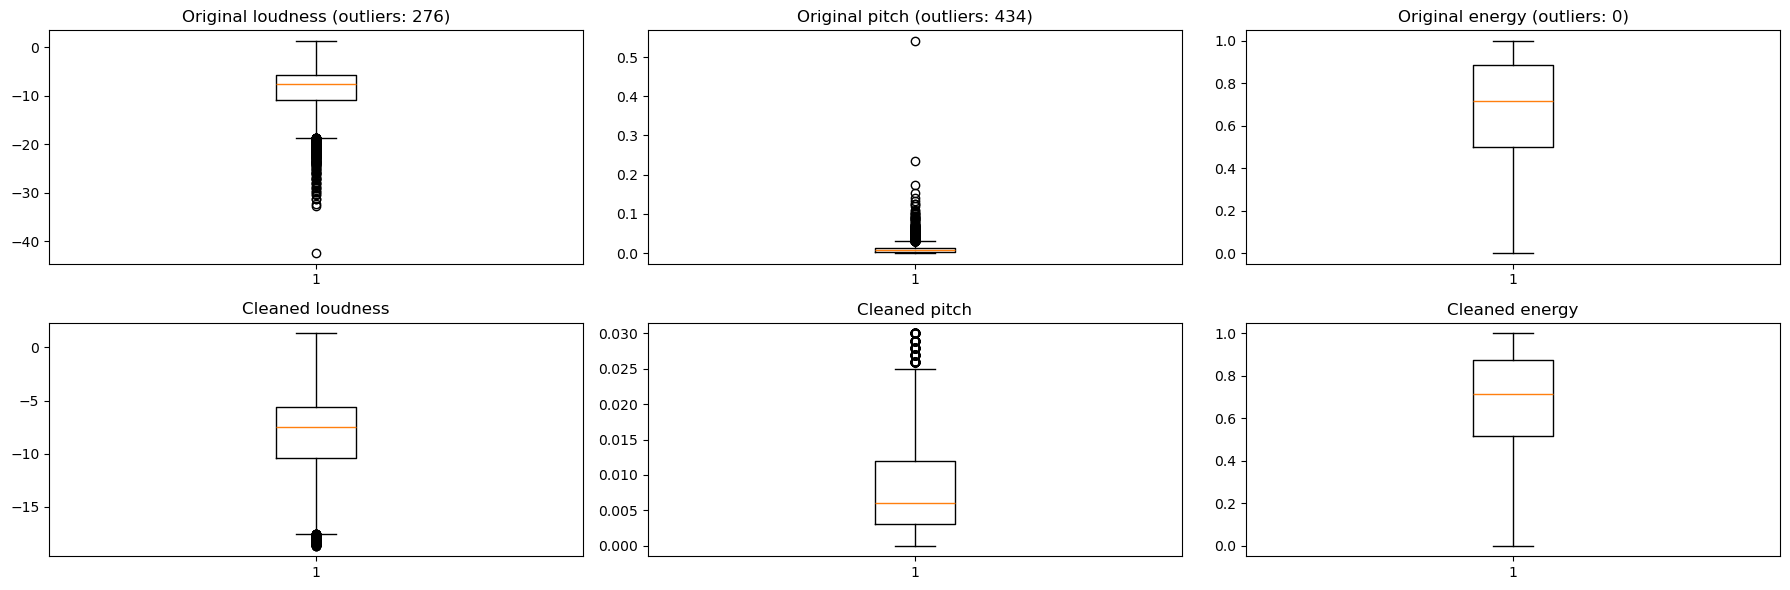


Number of rows after removing outliers: 7574


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


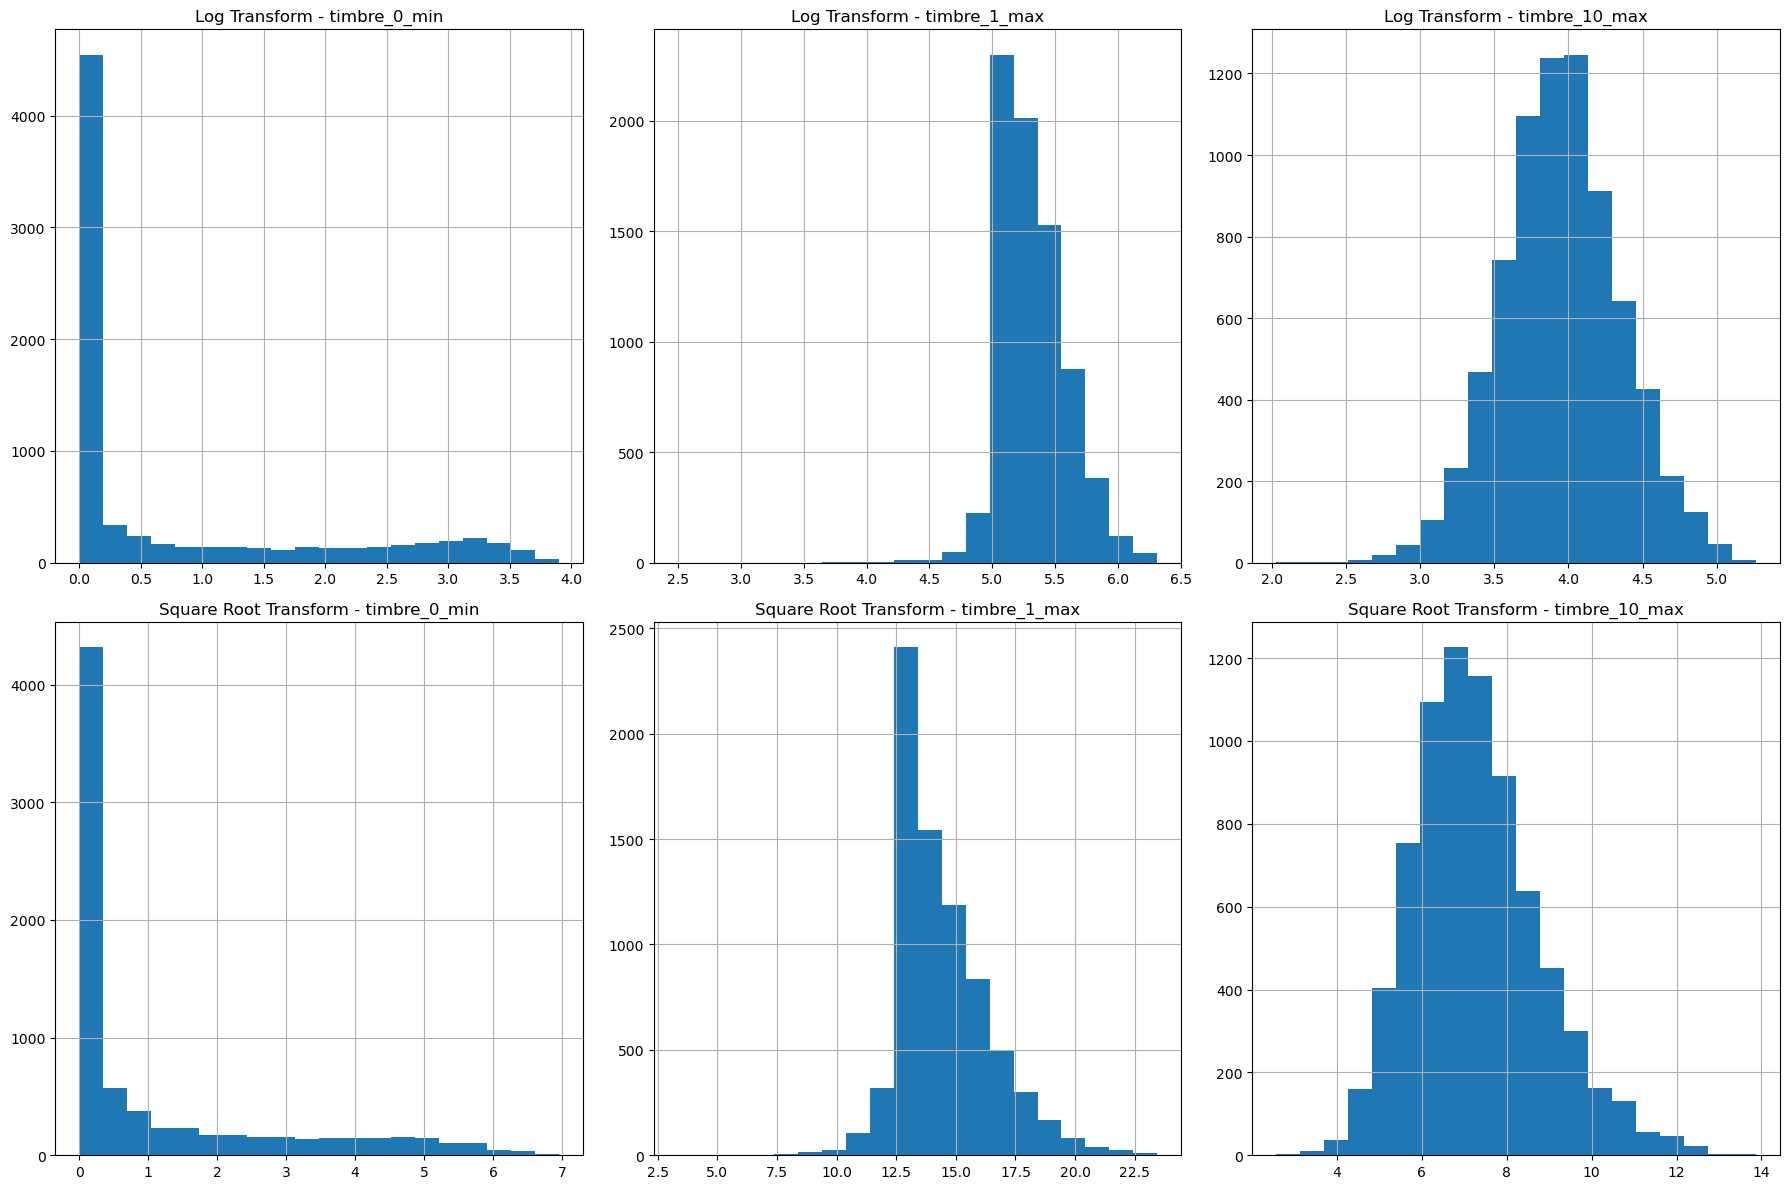

Optimization terminated successfully.
         Current function value: 0.328505
         Iterations 8

Logistic Regression Summary (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7161
Method:                           MLE   Df Model:                           39
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2138
Time:                        21:04:42   Log-Likelihood:                -2365.6
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.551e-244
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3758      0.053    -44.581      0.000      -2.4

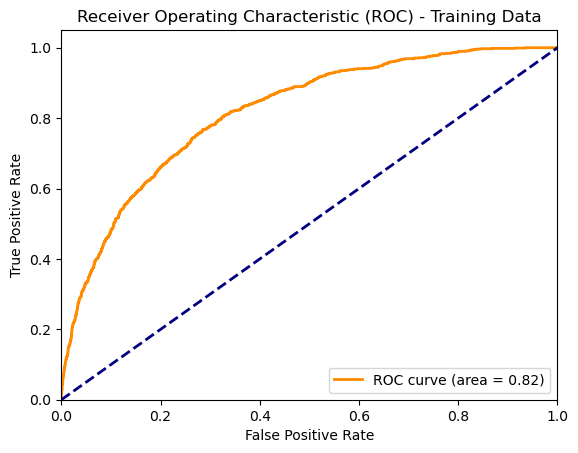


*** Summary of Predictions ***

Training Data:
Confusion Matrix:
[[4524 1617]
 [ 274  786]]
Accuracy: 0.7374
Precision: 0.3271
Recall: 0.7415
F1 Score: 0.4539
ROC AUC: 0.8157


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy import stats  # Importing scipy for additional transformations
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display count of null values for columns with more than 0 nulls
null_counts = df.isnull().sum()
print("\nColumns with more than 0 null values:")
print(null_counts[null_counts > 0])

# Removing unnecessary variables
df = df.drop(columns=['artistname', 'songtitle', 'songID', 'artistID'])

# Show count before outlier removal
print(f"\nNumber of rows before outlier removal: {df.shape[0]}")

# Improved function to identify and remove outliers using IQR
def identify_and_remove_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, df_no_outliers

# List of columns to check for outliers
columns_to_check = ['loudness', 'pitch', 'energy']

# Initialize a copy of the dataframe to preserve the original data
df_no_outliers = df.copy()

plt.figure(figsize=(18, 6))
outliers_info = {}  # Dictionary to store outliers info for each column
for i, col in enumerate(columns_to_check, start=1):
    # Identify and remove outliers for the current column
    outliers, df_no_outliers = identify_and_remove_outliers_iqr(df_no_outliers, col)
    outliers_info[col] = outliers

    # Plotting boxplot for original data
    plt.subplot(2, len(columns_to_check), i)
    plt.boxplot(df[col], vert=True)
    plt.title(f'Original {col} (outliers: {len(outliers)})')
    
    # Plotting boxplot for data after outlier removal
    plt.subplot(2, len(columns_to_check), i + len(columns_to_check))
    plt.boxplot(df_no_outliers[col], vert=True)
    plt.title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

# Display number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df.shape[0]}")

# Focus on the three skewed variables
variables = ['timbre_0_min', 'timbre_1_max', 'timbre_10_max']


# Apply log transformation (adding a small constant to avoid log(0))
df['log_timbre_0_min1'] = np.log1p(df['timbre_0_min'])
df['log_timbre_1_max1'] = np.log1p(df['timbre_1_max'])
df['log_timbre_10_max1'] = np.log1p(df['timbre_10_max'])

# Apply square root transformation
df['sqrt_timbre_0_min1'] = np.sqrt(df['timbre_0_min'])
df['sqrt_timbre_1_max1'] = np.sqrt(df['timbre_1_max'])
df['sqrt_timbre_10_max1'] = np.sqrt(df['timbre_10_max'])

# Visualize the transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

df['log_timbre_0_min1'].hist(bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Log Transform - timbre_0_min')
df['log_timbre_1_max1'].hist(bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Log Transform - timbre_1_max')
df['log_timbre_10_max1'].hist(bins=20, ax=axes[0, 2])
axes[0, 2].set_title('Log Transform - timbre_10_max')

df['sqrt_timbre_0_min1'].hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transform - timbre_0_min')
df['sqrt_timbre_1_max1'].hist(bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Square Root Transform - timbre_1_max')
df['sqrt_timbre_10_max1'].hist(bins=20, ax=axes[1, 2])
axes[1, 2].set_title('Square Root Transform - timbre_10_max')

plt.tight_layout()
plt.show()

# ** End of new code block **

# Split data by year: train up to 2009, test on 2010
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# Prepare the training data
X_train = train_df.drop(columns=["Top10", 'year'])
y_train = train_df["Top10"]

# Ensure no infinite values or NaNs before prediction
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a constant column for the intercept for statsmodels logistic regression
X_train_sm = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels' logistic regression
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary
print("\nLogistic Regression Summary (Statsmodels):")
print(result.summary())

# Fit the model using sklearn with regularization (L2 by default)
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_train_pred = (y_train_pred_prob > 0.15).astype(int)

# Creating a confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Computing the accuracy rate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# ** Summary of Predictions **

print("\n*** Summary of Predictions ***")

# Summary for Training Data
print("\nTraining Data:")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {roc_auc_train:.4f}")


### Question 2 [15 pts]: Predict the popularity of records in the testing set.
A logistic regression model was used to predict whether a song would reach the Top 10 on the Billboard Hot 100 Chart, using all available musical features in the provided dataset. For the test data, the model achieved an accuracy of 72.92% and an Area Under the Curve (AUC) of 0.85. With the AUC being > 0.5 the model will correctly rank a randomly chosen top 10 song higher than a non-top 10 song.

Steps Taken for the Analysis:

1.	Importing the Music Dataset: The dataset consists of 7,573 records and 39 fields, containing various musical features.
2.	Checking for Missing Values: No missing values were found, ensuring the data is complete and no biases are introduced that could affect the model’s accuracy.
3.	Identifying Outliers Using the IQR Method: While outliers can influence models by pulling them towards extreme values, no outliers were removed in this analysis, as these are natural properties of the songs.
4.	Handling Outliers: Despite identifying outliers, they were retained as they reflect genuine variations in song characteristics.
5.	Handling Skewed Data: Several numerical features (timbre_0_min, timbre_1_max, timbre_10_max) exhibited skewness. A log transformation was applied to these features to reduce skewness, creating more balanced distributions.
6.	Splitting the Data: The dataset was divided into training (songs from before 2009) and testing sets (songs from 2010), allowing for validation of the model on unseen data.
7.	Logistic Regression on Training Data: Features such as time signature, tempo, and key showed p-values greater than 0.05, indicating they might be insignificant. The impact of removing these features was evaluated.
8.	Examining Coefficients: Key insights were derived from examining the coefficients:
<br/>	•	Loudness (0.3015): Songs with higher loudness are more likely to reach the Top 10, aligning with trends favoring louder music.
<br/>	•	Pitch (-44.6714): Higher-pitched songs significantly decrease the likelihood of reaching the Top 10, highlighting a preference for songs with lower pitch.
9.	Confusion Matrix Analysis on Test Data:
<br/>	•	True Negatives: 224 instances correctly identified as not making the Top 10.
<br/>	•	False Positives: 90 instances incorrectly predicted as making the Top 10 (Type I Error).
<br/>	•	False Negatives: 11 instances incorrectly predicted as not making the Top 10 (Type II Error).
<br/>	•	True Positives: 48 instances correctly identified as making the Top 10.
The model tends to over-predict success (Top 10), suggesting the allocation of marketing resources to songs that might not succeed. However, it also maintains a high recall, indicating that potential hits are rarely missed.
10.	ROC Curve Analysis:
<br/>	•	AUC = 0.5: Indicates no discriminative power (akin to random guessing).
<br/>	•	AUC < 0.5: Indicates worse than random guessing (rare in practice).
<br/>	•	AUC > 0.5: Suggests the model has discriminatory power, with higher values indicating better performance.
The AUC of 0.85 signifies a high probability (85%) that the model will correctly rank a randomly chosen top 10 song higher than a non-top 10 song, demonstrating strong discriminatory ability.

These findings highlight critical trends and patterns that can guide music producers and marketers in optimizing their promotional strategies for potential hit songs. To further enhance the model’s accuracy, future steps will involve fine-tuning by removing features with p-values greater than 0.05.

Code below for Q2:

In [7]:
# Prepare the testing data
test_df = df[df['year'] > 2009]
X_test = test_df.drop(columns=["Top10", 'year'])
y_test = test_df["Top10"]

# Ensure no infinite values or NaNs before prediction
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())

# Scaling the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predicting probabilities and classes for test data
y_test_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_prob > 0.15).astype(int)

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Confusion Matrix:")
print(conf_matrix_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")


Test Confusion Matrix:
[[224  90]
 [ 11  48]]
Test Accuracy: 0.7292
Test Precision: 0.3478
Test Recall: 0.8136
Test F1 Score: 0.4873


### Question 3 [15 pts]:  Generate the ROC curve

The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve is a crucial metric for evaluating the discriminatory power of a binary classification model:
<br/>
<br/>	•	AUC = 0.5: This represents a model with no discriminative ability, equivalent to random guessing. The model is unable to distinguish between positive and negative classes.
<br/>	•	AUC < 0.5: This scenario indicates that the model performs worse than random guessing, which is uncommon in practice as it suggests systematic misclassification.
<br/>	•	AUC > 0.5: This value implies that the model has some degree of discriminatory power, with higher AUC values signifying better performance in distinguishing between the classes.
<br/>
<br/>Both the training and test datasets have AUC values greater than 0.5, confirming that the model possesses discriminative capability. Specifically, the AUC value for the test data is approximately 0.85. This indicates that the model has an 85% probability of ranking a randomly selected positive instance (a “Top 10” song) higher than a randomly selected negative instance (a song that is not in the “Top 10”).

Code below for Q3:

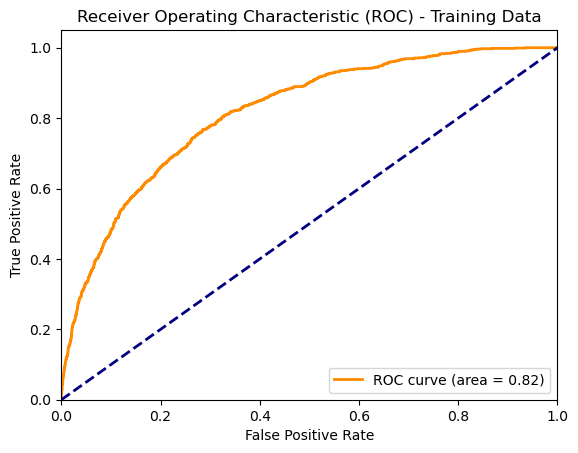

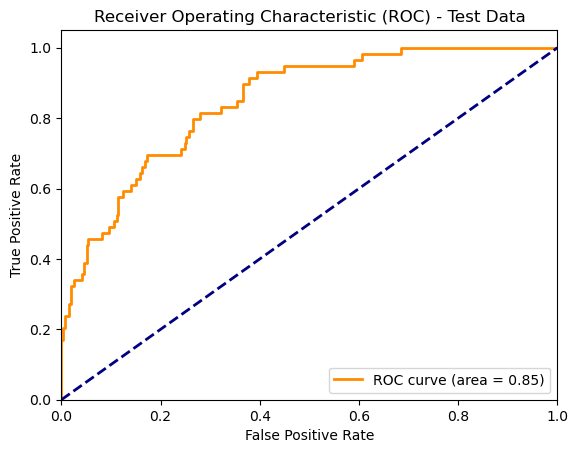

In [9]:

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

### Question 4: [30 pts]:  Improve the prediction performance of your model. For example, you may try transforming some predictors, and/or perform variable selection, or other approaches. Explain all steps! 

o enhance the prediction performance of the model, features with a p-value greater than 0.05 were removed. By eliminating these insignificant features, the test accuracy improved significantly from 72.92% to 86.86%. However, this change resulted in a decrease in recall from 81.03% to 20.34%, indicating that fewer songs were correctly identified as making it to the Top 10. The AUC remained consistent at 0.85, suggesting that the model’s ability to distinguish between hits and non-hits remained stable. Additionally, the Type I error (false positives) was reduced from 90 to 2, which is crucial for a music company to avoid unnecessary expenditure on marketing for songs unlikely to succeed. The Type II error (false negatives) increased from 11 to 47, indicating more missed opportunities (songs that could have made the Top 10 but were not predicted as such) compared to the previous model.

Steps Taken for the Analysis:

1.	Importing the Music Dataset: The dataset consists of 7,573 records and 39 fields, providing comprehensive information on various song attributes.
2.	Checking for Missing Values: No missing values were found, ensuring that there is no bias or reduced accuracy due to incomplete data.
3.	Identifying Outliers Using the IQR Method: Outliers can skew model predictions. However, in this dataset, outliers were not removed as they represent the intrinsic properties of the songs.
4.	Decision on Outliers: The choice was made not to remove outliers, given that they reflect genuine variations in song characteristics and may contain important information.
5.	Handling Skewed Data: Variables such as timbre_0_min, timbre_1_max, and timbre_10_max showed skewness. Log transformation was applied to these variables to normalize their distributions, which can improve model performance by reducing the influence of extreme values.
6.	Splitting the Data: The dataset was split into training (pre-2009) and test sets (2010) to evaluate the model’s predictive capability on unseen data. This temporal split ensures that the model’s performance is tested on a different time period than it was trained on.
7.	Performing Logistic Lasso Regression: Lasso regression was used to enhance feature selection, prevent overfitting, and handle multicollinearity. Lasso regression is particularly useful when dealing with many features, some of which may be irrelevant or redundant. This technique improved the model accuracy to 86.86%, showcasing its ability to select significant features and simplify the model.
8.	Logistic Regression on Training Data: Initial logistic regression modeling identified features like time_signature, tempo, and key with p-values greater than 0.05, indicating their insignificance in predicting the target variable.
9.	Removing Features with High p-values: Features such as key_confidence, key, time_signature, and tempo were removed due to their high p-values. Although some timbre features also had high p-values, they were retained to avoid reducing model accuracy, as they contribute significantly to the overall performance.
10.	Confusion Matrix on Test Data:
<br/>•	True Negatives (TN): 312 (correctly predicted not Top 10)
<br/>•	False Positives (FP): 2 (incorrectly predicted Top 10)
<br/>•	False Negatives (FN): 47 (incorrectly predicted not Top 10)
<br/>•	True Positives (TP): 12 (correctly predicted Top 10)
<br/>•	The model tends to over-predict success (Top 10), which can lead to unnecessary marketing expenditure. However, false negatives represent missed opportunities for potential hits, indicating a need for better balance between recall and precision.
11.	ROC Curve on Test Data:
<br/>•	AUC = 0.85: Indicates a high level of discriminatory power. The model effectively distinguishes between Top 10 and non-Top 10 songs, demonstrating that there is an 85% probability that the model will correctly rank a randomly chosen Top 10 song higher than a non-Top 10 song.
12.	Recall: The model correctly identifies 20.34% of actual Top 10 songs, which shows a reduction from the initial recall rate. This suggests that while the model is accurate, it may miss a significant number of Top 10 songs.
13.	F1 Score: At 32.88%, the F1 score indicates a moderate balance between precision and recall. Although the model has high precision, the reduced recall impacts the overall F1 score, highlighting the trade-off between catching more true positives and avoiding false positives.
14.	Precision: With a precision of 85.71%, the model correctly predicts that a song will be a Top 10 hit 85.71% of the time. This high precision suggests that when the model predicts a song will be a hit, it is more likely to be accurate, minimizing the chances of false positives.


Columns with more than 0 null values:
Series([], dtype: int64)

Number of rows before outlier removal: 7574


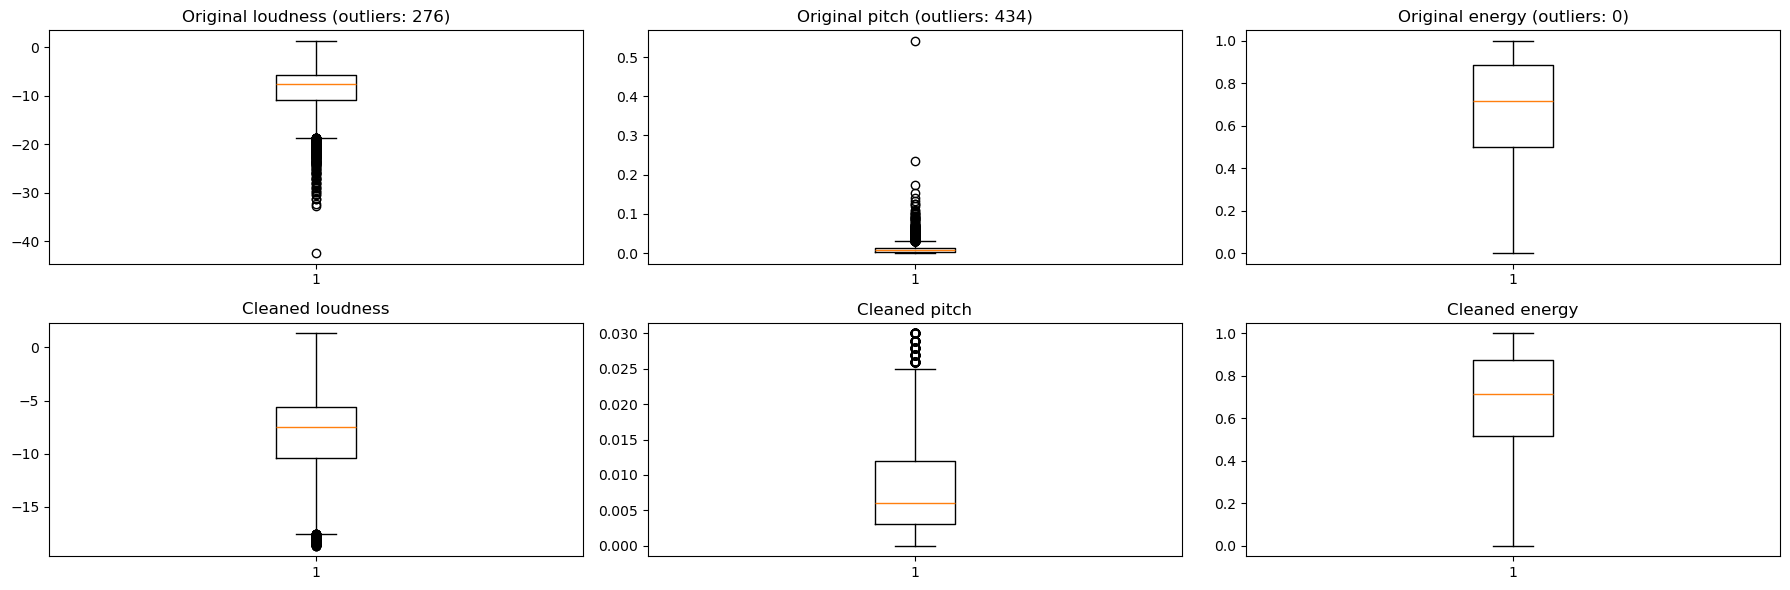


Number of rows after removing outliers: 7574


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


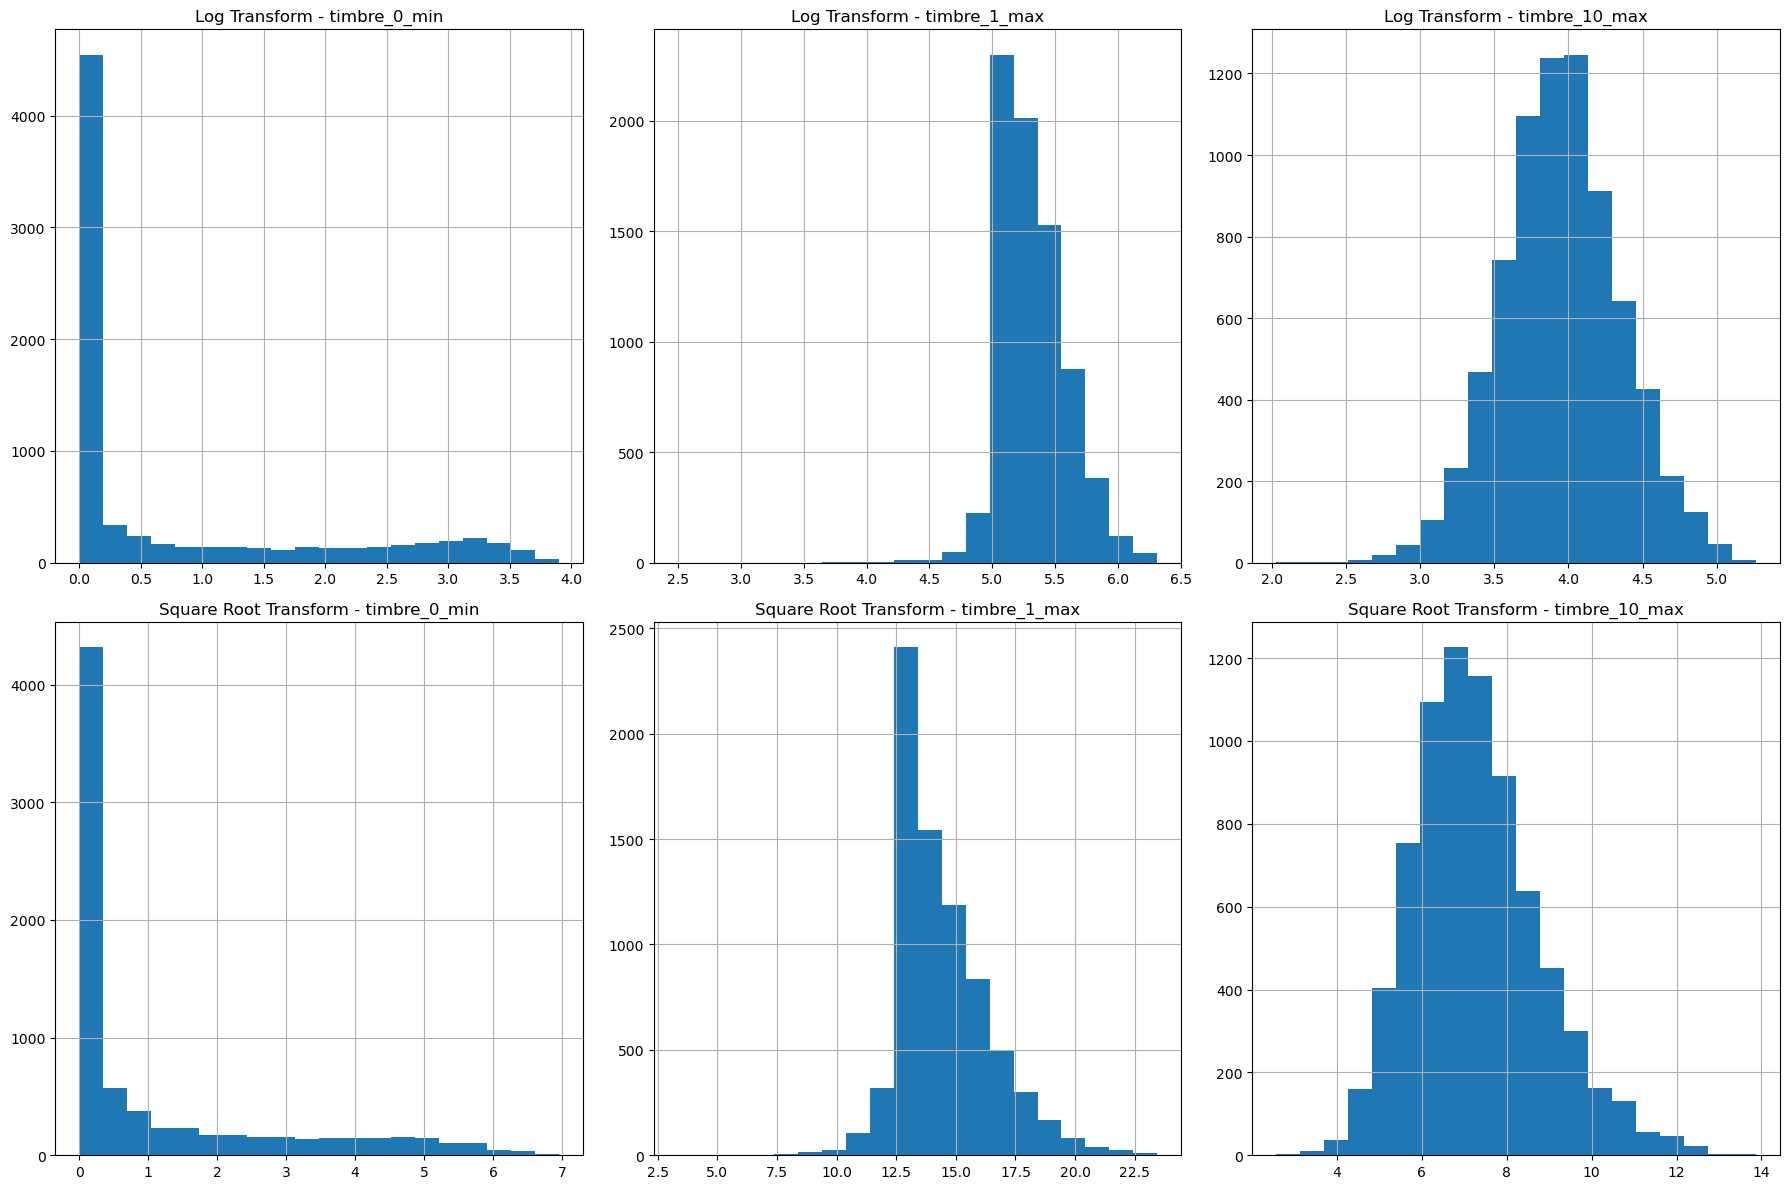


Class distribution in train_df['Top10']:
Top10
0    6141
1    1060
Name: count, dtype: int64
Optimization terminated successfully.
         Current function value: 0.329111
         Iterations 8

Logistic Regression Summary (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7165
Method:                           MLE   Df Model:                           35
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2123
Time:                        21:11:10   Log-Likelihood:                -2369.9
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                8.466e-246
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

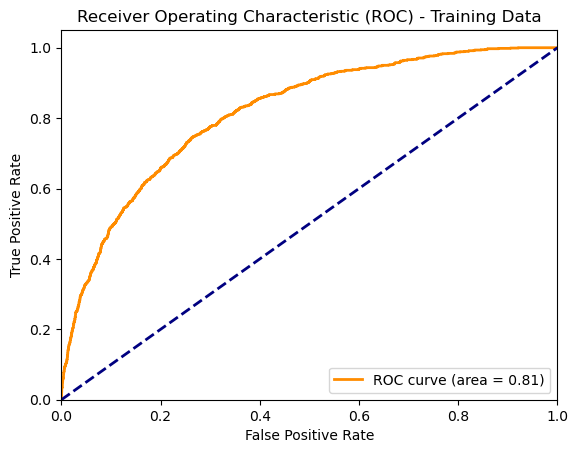

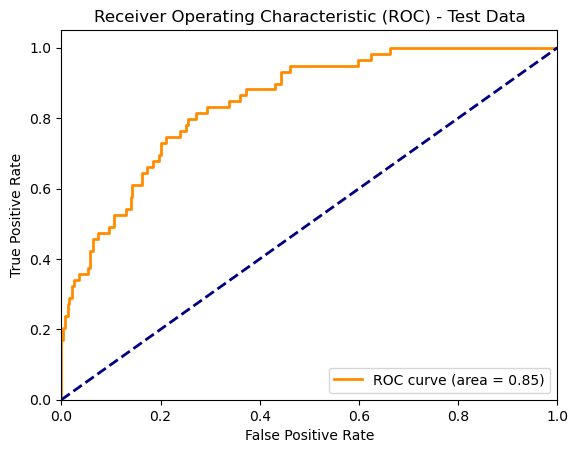


*** Summary of Predictions ***

Training Data:
Confusion Matrix:
[[6011  130]
 [ 859  201]]
Accuracy: 0.8627
Precision: 0.6073
Recall: 0.1896
F1 Score: 0.2890
ROC AUC: 0.8150

Test Data:
Confusion Matrix:
[[312   2]
 [ 47  12]]
Accuracy: 0.8686
Precision: 0.8571
Recall: 0.2034
F1 Score: 0.3288
ROC AUC: 0.8453


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("MusicData.csv", encoding='ISO-8859-1')

# Display count of null values for columns with more than 0 nulls
null_counts = df.isnull().sum()
print("\nColumns with more than 0 null values:")
print(null_counts[null_counts > 0])

# Removing unnecessary variables
df = df.drop(columns=['artistname', 'songtitle', 'songID', 'artistID', 'key_confidence', 'key', 'timesignature', 'tempo'])

# Show count before outlier removal
print(f"\nNumber of rows before outlier removal: {df.shape[0]}")

# Improved function to identify and remove outliers using IQR
def identify_and_remove_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers, df_no_outliers

# List of columns to check for outliers
columns_to_check = ['loudness', 'pitch', 'energy']

# Initialize a copy of the dataframe to preserve the original data
df_no_outliers = df.copy()

plt.figure(figsize=(18, 6))
outliers_info = {}  # Dictionary to store outliers info for each column
for i, col in enumerate(columns_to_check, start=1):
    # Identify and remove outliers for the current column
    outliers, df_no_outliers = identify_and_remove_outliers_iqr(df_no_outliers, col)
    outliers_info[col] = outliers

    # Plotting boxplot for original data
    plt.subplot(2, len(columns_to_check), i)
    plt.boxplot(df[col], vert=True)
    plt.title(f'Original {col} (outliers: {len(outliers)})')
    
    # Plotting boxplot for data after outlier removal
    plt.subplot(2, len(columns_to_check), i + len(columns_to_check))
    plt.boxplot(df_no_outliers[col], vert=True)
    plt.title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

# Display number of rows after removing outliers
print(f"\nNumber of rows after removing outliers: {df.shape[0]}")

# Focus on the three skewed variables
variables = ['timbre_0_min', 'timbre_1_max', 'timbre_10_max']

# Apply log transformation (adding a small constant to avoid log(0))
df['log_timbre_0_min1'] = np.log1p(df['timbre_0_min'])
df['log_timbre_1_max1'] = np.log1p(df['timbre_1_max'])
df['log_timbre_10_max1'] = np.log1p(df['timbre_10_max'])

# Apply square root transformation
df['sqrt_timbre_0_min1'] = np.sqrt(df['timbre_0_min'])
df['sqrt_timbre_1_max1'] = np.sqrt(df['timbre_1_max'])
df['sqrt_timbre_10_max1'] = np.sqrt(df['timbre_10_max'])

# Visualize the transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

df['log_timbre_0_min1'].hist(bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Log Transform - timbre_0_min')
df['log_timbre_1_max1'].hist(bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Log Transform - timbre_1_max')
df['log_timbre_10_max1'].hist(bins=20, ax=axes[0, 2])
axes[0, 2].set_title('Log Transform - timbre_10_max')

df['sqrt_timbre_0_min1'].hist(bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Square Root Transform - timbre_0_min')
df['sqrt_timbre_1_max1'].hist(bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Square Root Transform - timbre_1_max')
df['sqrt_timbre_10_max1'].hist(bins=20, ax=axes[1, 2])
axes[1, 2].set_title('Square Root Transform - timbre_10_max')

plt.tight_layout()
plt.show()

# Split data by year: train up to 2009, test on 2010
train_df = df[df['year'] <= 2009]
test_df = df[df['year'] == 2010]

# Check class distribution after splitting
print("\nClass distribution in train_df['Top10']:")
print(train_df['Top10'].value_counts())

# Prepare the training data
X_train = train_df.drop(columns=["Top10", 'year'])
y_train = train_df["Top10"]

# Prepare the testing data
X_test = test_df.drop(columns=["Top10", 'year'])
y_test = test_df["Top10"]

# Ensure no infinite values or NaNs before prediction
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# Ensure no infinite values or NaNs before prediction
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model using statsmodels' logistic regression
X_train_sm = sm.add_constant(X_train_scaled)  # Adding intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Displaying the summary with actual column names
print("\nLogistic Regression Summary (Statsmodels):")
print(result.summary(xname=['const'] + X_train.columns.tolist()))

# Logistic Regression with Lasso (L1) Regularization using sklearn
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso_log_reg.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred_prob = lasso_log_reg.predict_proba(X_train_scaled)[:, 1]
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Creating a confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Computing the accuracy rate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Confusion Matrix:")
print(train_conf_matrix)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1 Score: {train_f1:.4f}")

# Predicting probabilities and classes for test data
y_test_pred_prob = lasso_log_reg.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Confusion Matrix:")
print(conf_matrix_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# ROC Curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()

# ROC Curve and AUC for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()

# ** Summary of Predictions **

print("\n*** Summary of Predictions ***")

# Summary for Training Data
print("\nTraining Data:")
print(f"Confusion Matrix:\n{train_conf_matrix}")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {roc_auc_train:.4f}")

# Summary for Test Data
print("\nTest Data:")
print(f"Confusion Matrix:\n{conf_matrix_test}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC AUC: {roc_auc_test:.4f}")

### Question 5 [25 pts]:  Choose 5 coefficients from the finally chosen model and interpret them.


1.	Pitch (Coefficient: -0.6153) - Since Pitch has a negative coefficient, it means that it has a decreased probability of the song being top 10. This suggests that songs with a higher pitch values are less likely to achieve Top 10 status. This could possibly be due to lower or more moderate pitches, which could be perceived as more pleasant or emotionally resonant. Which could possibly affect the probability if the song will make top 10 on the billboard.
2.	Loudness (Coefficient: 1.3307) - Since loudness has a very large positive coefficient, this indicates that the likelihood of being in the Top 10. This suggests that louder songs may be more appealing to audiences such as radio, festivals or clubs.
3.	Time Signature Confidence (Coefficient: 0.1935) - Since Time Signature Confidence is positive it indicates that the song has an increased probability of making Top 10. This maybe due to song with high rhythm song structure may enhance the listening experience.
4.	Energy (Coefficient: -0.3759) - Since energy has a negative coefficient this means that songs with energy have a lower probability of a song making into the Top 10. This suggests that energetic songs might not be as popular among listeners, who may prefer songs with a more moderate or balanced level of energy. This could possibly mean that songs that are more relaxing have a higher chance of making top 10 on the billboards.
5.	Tempo Confidence (Coefficient: 0.1397) - Since Tempo has a small positive coefficient this suggests that faster tempos are slightly associated with a higher likelihood of a song being in the Top 10. Tempo influences the overall feel and pace of a song, potentially affecting its energy and mood. The positive coefficient suggests that faster-paced songs may increase the probability of the song making top 10 on the billboards.


In [12]:
# Displaying the summary with actual column names
print("\nLogistic Regression Summary (Statsmodels):")
print(result.summary(xname=['const'] + X_train.columns.tolist()))


Logistic Regression Summary (Statsmodels):
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7165
Method:                           MLE   Df Model:                           35
Date:                Sat, 31 Aug 2024   Pseudo R-squ.:                  0.2123
Time:                        21:11:38   Log-Likelihood:                -2369.9
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                8.466e-246
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.3695      0.053    -44.636      0.000      -2.474      -2.265
timesignature_confidence     0.1935      0.04